In [ ]:
"""
Multiple Linear Regression Model

1.    Consider the columns, ‘RM’, ‘DIS’, ‘TAX’, ‘INDUS’ as predictors, and ‘MEDV’ as the target variable

2.    Calculate the Variance Inflation Factor for each of the selected predictors. Based on the VIF factor, finalize the list of predictors.

3.    For every predictor identified, visualize its association with the target column using scatter plot.

4.    Split the data into train and test datasets, in the ratio of 67:33.

5.    Build a Linear Regression model, to predict the target variable using the selected predictors.

6.    Observe the coefficients and intercept values for the model. 

7.    Evaluate the model using mean squared error values, R-squared values, and adjusted R-Squared values, on the train and the test data.

"""

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
boston_housing = pd.read_csv("../../datasets/boston_housing.csv")

In [5]:
"""
Dataset relating to the median price of a house in Boston (MEDV), given factors such as crime rate, zone, age, 
district etc.
"""

boston_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
boston_housing.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [8]:
boston_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# predictor/target variables

x = boston_housing[["RM","DIS","TAX","INDUS"]]
y = boston_housing["MEDV"]

In [11]:
# calculate VIF of predictor variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.Series([variance_inflation_factor(x.values,idx) 
           for idx in range(x.shape[1])],
          index=x.columns)

print(vif)

RM       16.747965
DIS       6.880607
TAX      13.861510
INDUS     9.598374
dtype: float64


In [12]:
# RM and TAX VIF values are too high, use DIS and INDUS as the predictor variables

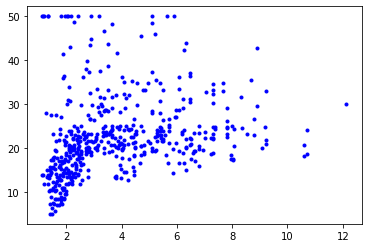

In [32]:
# visualise relationship between each predictor and target variable

plt.scatter(boston_housing["DIS"], boston_housing["MEDV"], color = "blue", marker = ".")

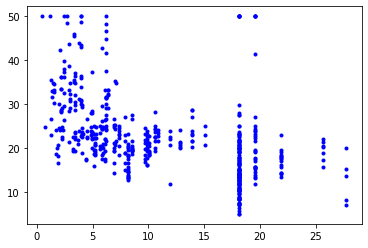

In [17]:
plt.scatter(boston_housing["INDUS"], boston_housing["MEDV"], color = "blue", marker = ".")

In [18]:
# selecting predictor/target variables

x_new = boston_housing[["DIS","INDUS"]]
y = boston_housing["MEDV"]

In [19]:
# split data and build model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_new, y, train_size = 0.67, random_state = 0)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# coefficient and intercept values model has calculated

print("Model coefficient: ", model.coef_)
print("Model intercept: ", model.intercept_)

Model coefficient:  [-0.87622458 -0.8498507 ]
Model intercept:  35.540505419718116


In [21]:
# evaluate using R2

R2_train = model.score(x_train,y_train)
R2_test = model.score(x_test,y_test)

print("R2 train: ", R2_train)
print("R2 test: ", R2_test)

R2 train:  0.27589603455671663
R2 test:  0.19052213277175478


In [24]:
# evaluate using root mean squared error

from sklearn.metrics import mean_squared_error

train_predictions = model.predict(x_train)
train_RMSE = mean_squared_error(y_train,train_predictions)**0.5

print("Train RMSE", train_RMSE)

test_predictions = model.predict(x_test)
test_RMSE = mean_squared_error(y_test,test_predictions)**0.5

print("Test RMSE", test_RMSE)

Train RMSE 7.893119796595275
Test RMSE 8.078479851195771


In [43]:
# build model with all predictors

x = boston_housing.drop("MEDV",axis = 1)
y = boston_housing["MEDV"]

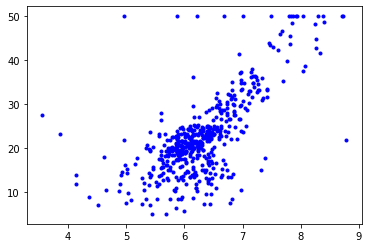

In [44]:
plt.scatter(boston_housing["RM"], boston_housing["MEDV"], color = "blue", marker = ".")

In [46]:
# build model with standardized values

from sklearn import preprocessing

standardized_x = preprocessing.scale(x)
standardized_y = preprocessing.scale(y)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(standardized_x, standardized_y, train_size = 0.67, random_state = 0)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# coefficient and intercept values model has calculated

print("Model coefficient: ", model.coef_)
print("Model intercept: ", model.intercept_)

Model coefficient:  [-0.1114248   0.12078423  0.0023227   0.06952931 -0.20910539  0.28002369
 -0.0348824  -0.36360869  0.23879452 -0.19904596 -0.24670283  0.06135387
 -0.4035992 ]
Model intercept:  -0.01181025260222636


In [48]:
# evaluate using R2

R2_train = model.score(x_train,y_train)
R2_test = model.score(x_test,y_test)

print("R2 train: ", R2_train)
print("R2 test: ", R2_test)

R2 train:  0.7677157140026537
R2 test:  0.6705795412578806


In [49]:
# evaluate using root mean squared error

from sklearn.metrics import mean_squared_error

train_predictions = model.predict(x_train)
train_RMSE = mean_squared_error(y_train,train_predictions)**0.5

print("Train RMSE", train_RMSE)

test_predictions = model.predict(x_test)
test_RMSE = mean_squared_error(y_test,test_predictions)**0.5

print("Test RMSE", test_RMSE)

Train RMSE 0.48656023723204966
Test RMSE 0.560894147275653
